# **Importation and initial exploration**

In [12]:
#!pip install skrub
#!pip install ydata-profiling
#!pip install geopy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("train.csv")
df = df.drop('id', axis=1)
df.head()

is_appartment   area  added_time  bedrooms  new_building  postcode  \
0           True   88.0   141725167       2.0             0      8300   
1           True   55.0   132223171       1.0             0      1800   
2          False  333.0   119151262       4.0             0      3294   
3          False  517.0   137313038       5.0             0      1700   
4           True   99.0   137303955       3.0             0      8300   

         lat       lon                    advertiser  foto_amount  \
0  51.342160  3.287791                        Vastio         12.0   
1  50.933980  4.436390                  Ring Consult         10.0   
2  50.996456  5.045376  Hillewaere Heist-op-den-Berg         30.0   
3  50.843364  4.274004          Living Stone Dilbeek         31.0   
4  51.348180  3.276942                  Colpin Heist         13.0   

   is_promoted          subtype sticker      price_drop_date  energy_value  \
0            1      Appartement     NaN                  NaN         210.0   
1            1      Appartement     NaN                  NaN          92.0   
2            1            Villa     NaN  2024-06-08 23:29:39           NaN   
3            1  Eengezinswoning     NaN                  NaN         322.0   
4            1      Appartement     NaN                  NaN         161.0   

  energy_label         province     price  
0            c  West-Vlaanderen  599000.0  
1            a   Vlaams-Brabant  199000.0  
2            f   Vlaams-Brabant  875000.0  
3            d   Vlaams-Brabant  649000.0  
4            b  West-Vlaanderen  765000.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27071 entries, 0 to 27070
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_appartment    27071 non-null  bool   
 1   area             24301 non-null  float64
 2   added_time       27071 non-null  int64  
 3   bedrooms         27071 non-null  float64
 4   new_building     27071 non-null  int64  
 5   postcode         27071 non-null  int64  
 6   lat              26434 non-null  float64
 7   lon              26434 non-null  float64
 8   advertiser       26736 non-null  object 
 9   foto_amount      27071 non-null  float64
 10  is_promoted      27071 non-null  int64  
 11  subtype          26985 non-null  object 
 12  sticker          3692 non-null   object 
 13  price_drop_date  2190 non-null   object 
 14  energy_value     19731 non-null  float64
 15  energy_label     21065 non-null  object 
 16  province         27071 non-null  object 
 17  price       

In [9]:
df.describe()

area    added_time      bedrooms  new_building      postcode  \
count  24301.000000  2.707100e+04  27071.000000  27071.000000  27071.000000   
mean     159.384255  1.350960e+08      2.766798      0.201803   5726.567027   
std      170.332701  1.278291e+07      1.408334      0.401353   3059.393178   
min        6.000000  0.000000e+00      0.000000      0.000000   1000.000000   
25%       96.000000  1.342782e+08      2.000000      0.000000   2845.000000   
50%      140.000000  1.388595e+08      3.000000      0.000000   5100.000000   
75%      192.000000  1.418832e+08      3.000000      0.000000   8800.000000   
max    22189.000000  1.431944e+08     48.000000      1.000000   9992.000000   

                lat           lon   foto_amount  is_promoted   energy_value  \
count  26434.000000  26434.000000  27071.000000      27071.0   19731.000000   
mean      50.952668      4.235877     17.905729          1.0     359.011067   
std        0.269572      0.845910      9.511293          0.0    4299.242292   
min       43.591236      1.676069      0.000000          1.0     -48.000000   
25%       50.829390      3.543620     11.000000          1.0     147.000000   
50%       50.981825      4.324525     17.000000          1.0     253.000000   
75%       51.143902      4.893633     24.000000          1.0     407.000000   
max       51.501060     15.166060    131.000000          1.0  579759.000000   

               price  
count   27071.000000  
mean   365604.127699  
std    178462.828584  
min     45000.000000  
25%    240000.000000  
50%    328000.000000  
75%    449000.000000  
max    999999.000000

# **Split data**

In [5]:
from sklearn.model_selection import train_test_split

# Split features (X) and target (y)
X = df.drop('price', axis=1)  # All columns except target
y = df['price']  # Target

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sizes
print("Size X_train :", X_train.shape)
print("Size X_test :", X_test.shape)
print("Size y_train :", y_train.shape)
print("Size y_test :", y_test.shape)

Size X_train : (21656, 17)
Size X_test : (5415, 17)
Size y_train : (21656,)
Size y_test : (5415,)


In [6]:
df_train = X_train.join(y_train)
df_test = X_test.join(y_test)
df_train.head()

is_appartment    area  added_time  bedrooms  new_building  postcode  \
6148           False  233.00   137834664       4.0             0      5170   
5883            True   70.00   119647464       2.0             0      3530   
15811          False     NaN   142400917       2.0             0      8640   
14176          False     NaN   142304561       5.0             0      3071   
15203          False  208.03   134291628       5.0             0      5563   

             lat       lon                    advertiser  foto_amount  \
6148   50.379080  4.856770                Team Construct          9.0   
5883   51.005499  5.465612                   Immo Wereld         26.0   
15811  50.925874  2.746209  Verhaeghe, Baert & Vertriest         32.0   
14176  50.901116  4.558339                  Hilde Toelen         30.0   
15203  50.163738  5.042059         Easy Home Immo Marche         26.0   

       is_promoted subtype sticker price_drop_date  energy_value energy_label  \
6148             1  Woning     NaN             NaN           NaN          NaN   
5883             1  Duplex     NaN             NaN         378.0            d   
15811            1  Woning     NaN             NaN         641.0            f   
14176            1   Villa     NaN             NaN         298.0            c   
15203            1  Woning     NaN             NaN         480.0            f   

              province     price  
6148             Namen  585502.0  
5883           Limburg   89000.0  
15811  West-Vlaanderen   95000.0  
14176   Vlaams-Brabant  959000.0  
15203            Namen  340000.0

# **Exploratory Data Analysis**

## As-is data analysis

In [7]:
from skrub import TableReport
TableReport(df_train)

Processing column  18 / 18


<TableReport: use .open() to display>

## Visual analytics

In [34]:
from ydata_profiling import ProfileReport

ProfileReport(df_train, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Key takeaways**

[TO BE DONE]

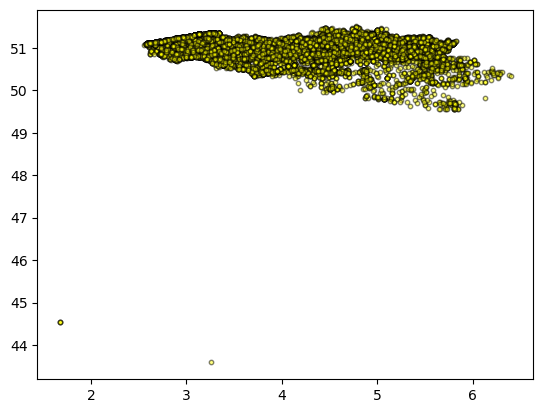

In [35]:
plt.scatter(df_train['lon'], df_train['lat'], alpha=0.5, c='yellow', edgecolors='k', s=10)
plt.show()

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train['area'])
plt.title('Boxplot of Area')
plt.show()

NameError: name 'df_train' is not defined

<Figure size 1200x600 with 0 Axes>

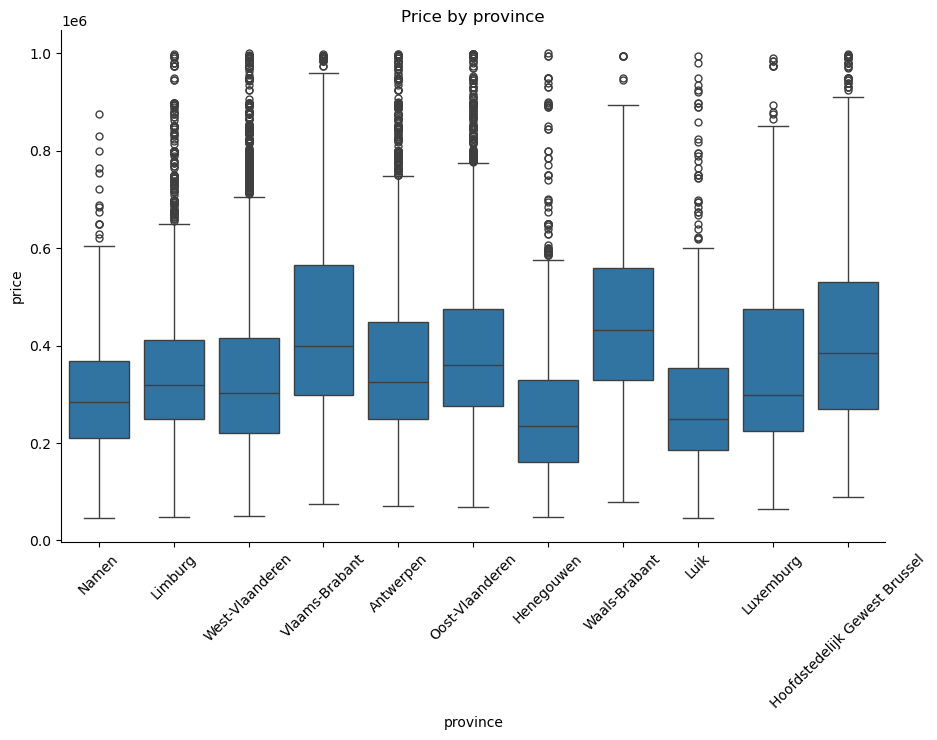

In [37]:
# Boxplot of prices by province
sns.catplot(x='province', y='price', kind='box', data=df_train, height=6, aspect=1.5)
plt.xticks(rotation=45)
plt.title('Price by province')
plt.show()

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'added_time'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'new_building'}>,
        <Axes: title={'center': 'postcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'lon'}>,
        <Axes: title={'center': 'foto_amount'}>,
        <Axes: title={'center': 'is_promoted'}>],
       [<Axes: title={'center': 'energy_value'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

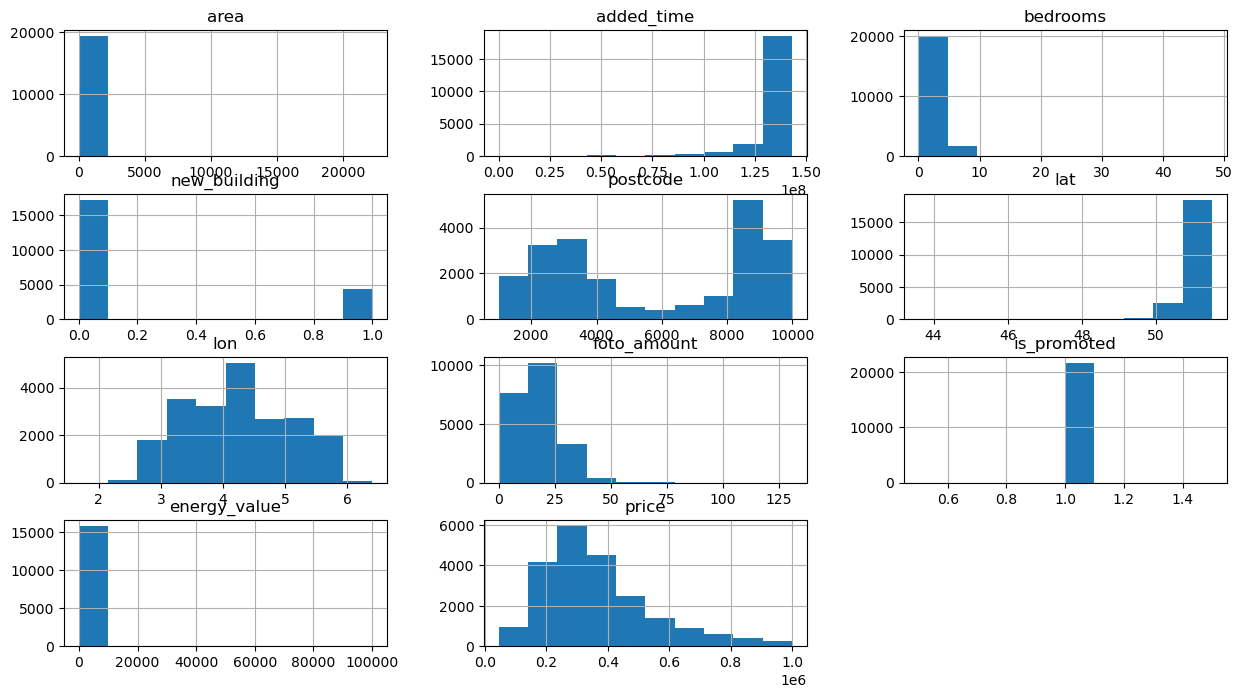

In [38]:
df_train.hist(figsize=(15,8))

## Data validation

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21656 entries, 6148 to 23654
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_appartment    21656 non-null  bool   
 1   area             19415 non-null  float64
 2   added_time       21656 non-null  int64  
 3   bedrooms         21656 non-null  float64
 4   new_building     21656 non-null  int64  
 5   postcode         21656 non-null  int64  
 6   lat              21150 non-null  float64
 7   lon              21150 non-null  float64
 8   advertiser       21392 non-null  object 
 9   foto_amount      21656 non-null  float64
 10  is_promoted      21656 non-null  int64  
 11  subtype          21586 non-null  object 
 12  sticker          2956 non-null   object 
 13  price_drop_date  1764 non-null   object 
 14  energy_value     15753 non-null  float64
 15  energy_label     16820 non-null  object 
 16  province         21656 non-null  object 
 17  price         

In [40]:
# Sanity checks

# Booleans coded in int verification
print("Unique values of 'new_building' :", df_train['new_building'].unique())
print("Unique values of 'is_promoted' :", df_train['is_promoted'].unique())

# lat/lon consistency
print("Not consistent latitudes :", len(df_train[(df_train['lat'] < -90) | (df_train['lat'] > 90)]))
print("Not consistent longitudes :", len(df_train[(df_train['lon'] < -180) | (df_train['lon'] > 180)]))

Unique values of 'new_building' : [0 1]
Unique values of 'is_promoted' : [1]
Not consistent latitudes : 0
Not consistent longitudes : 0


# **Preprocessing**

In [12]:
df_train['bedrooms'] = df_train['bedrooms'].astype(int)
df_train['foto_amount'] = df_train['foto_amount'].astype(int)
df_train['postcode'] = df_train['postcode'].astype(str)

df_train = df_train.drop(columns=['is_promoted']) # drop because only 1's in the column
df_train = df_train.drop(columns=['price_drop_date']) # 91.85% missing values
df_train = df_train.drop(columns=['sticker']) #86.35% missing values
df_train = df_train.drop(columns=['added_time']) #No link with the price

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21656 entries, 6148 to 23654
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   is_appartment  21656 non-null  bool   
 1   area           19415 non-null  float64
 2   bedrooms       21656 non-null  int32  
 3   new_building   21656 non-null  int64  
 4   postcode       21656 non-null  object 
 5   lat            21150 non-null  float64
 6   lon            21150 non-null  float64
 7   advertiser     21392 non-null  object 
 8   foto_amount    21656 non-null  int32  
 9   subtype        21586 non-null  object 
 10  energy_value   15753 non-null  float64
 11  energy_label   16820 non-null  object 
 12  province       21656 non-null  object 
 13  price          21656 non-null  float64
dtypes: bool(1), float64(5), int32(2), int64(1), object(5)
memory usage: 2.7+ MB


## Removal of obvious extreme outliers in data set by imputing their values with NaN

In [13]:
df_train.loc[df_train['area'] > 20000, 'area'] = np.nan
df_train.loc[df_train['lat'] < 45, 'lat'] = np.nan
df_train.loc[df_train['lat'].isna(), 'lon'] = np.nan

## Missing values detection

In [14]:
print(df_train.isna().sum().sort_values(ascending=False))

#Percentage of missing values
print("\nIn percentages:\n")
print((df_train.isna().mean() * 100).sort_values(ascending=False).round(2)) # .mean used on boolean counts the %

energy_value     5903
energy_label     4836
area             2242
lat               510
lon               510
advertiser        264
subtype            70
is_appartment       0
bedrooms            0
new_building        0
postcode            0
foto_amount         0
province            0
price               0
dtype: int64

In percentages:

energy_value     27.26
energy_label     22.33
area             10.35
lat               2.36
lon               2.36
advertiser        1.22
subtype           0.32
is_appartment     0.00
bedrooms          0.00
new_building      0.00
postcode          0.00
foto_amount       0.00
province          0.00
price             0.00
dtype: float64


## Missing values treatement

We foresee imputation strategies for all the columns for more robustness.

In [15]:
from sklearn.impute import SimpleImputer

# Impute missing advertiser with new category "other"
df_train['advertiser'] = df_train['advertiser'].fillna('Other')

# Define imputation strategies
median_imputer = SimpleImputer(strategy='median')  
mode_imputer = SimpleImputer(strategy='most_frequent')  

# Columns to be imputed with medians
median_cols = ['energy_value', 'area','lon','lat','bedrooms','foto_amount']
# Columns to be imputed with mode
mode_cols = ['energy_label', 'subtype','new_building','is_appartment','postcode','province']

# Impute
df_train[median_cols] = median_imputer.fit_transform(df_train[median_cols])
df_train[mode_cols] = mode_imputer.fit_transform(df_train[mode_cols])

print(df_train.isna().sum().sort_values(ascending=False)) #check no more missing values

is_appartment    0
area             0
bedrooms         0
new_building     0
postcode         0
lat              0
lon              0
advertiser       0
foto_amount      0
subtype          0
energy_value     0
energy_label     0
province         0
price            0
dtype: int64


## Outliers detection (IQR method)

In [16]:
# List of numeric columns to analyze
numeric_cols = ['price', 'area', 'bedrooms', 'foto_amount', 'energy_value']

# Function to detect outliers using IQR
def detect_outliers(df_train, column):
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers_below = df_train[df_train[column] < lower_bound][column]
    outliers_above = df_train[df_train[column] > upper_bound][column]  
    total_outliers = len(outliers_below) + len(outliers_above)
    
    return {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_below': len(outliers_below),
        'outliers_above': len(outliers_above),
        'total_outliers': total_outliers,
        'percentage': (total_outliers / len(df_train[column].dropna())) * 100 
    }

# Analyze each numeric column
for col in numeric_cols:
    if col in df_train.columns:  # Ensure column exists 
        result = detect_outliers(df_train, col)
        print(f"\nColumn: {col}")
        print(f"Lower Bound: {result['lower_bound']:.2f}")
        print(f"Upper Bound: {result['upper_bound']:.2f}")
        print(f"Outliers below: {result['outliers_below']}")
        print(f"Outliers above: {result['outliers_above']}")
        print(f"Total outliers: {result['total_outliers']}")
        print(f"Percentage of outliers: {result['percentage']:.2f}%")
    else:
        print(f"\nColumn: {col} not found in df_train")


Column: price
Lower Bound: -73500.00
Upper Bound: 762500.00
Outliers below: 0
Outliers above: 973
Total outliers: 973
Percentage of outliers: 4.49%

Column: area
Lower Bound: -27.50
Upper Bound: 312.50
Outliers below: 0
Outliers above: 1122
Total outliers: 1122
Percentage of outliers: 5.18%

Column: bedrooms
Lower Bound: 0.50
Upper Bound: 4.50
Outliers below: 856
Outliers above: 1610
Total outliers: 2466
Percentage of outliers: 11.39%

Column: foto_amount
Lower Bound: -8.50
Upper Bound: 43.50
Outliers below: 0
Outliers above: 322
Total outliers: 322
Percentage of outliers: 1.49%

Column: energy_value
Lower Bound: -42.00
Upper Bound: 566.00
Outliers below: 1
Outliers above: 2036
Total outliers: 2037
Percentage of outliers: 9.41%


## Outliers treatement

**Price outliers**

The price outliers, in the context of real estate, are likely valid. Moreover, they account for a relatively low portion of the data set, namely 4.49%. We will keep them and apply a log transformation to handle skewness. 

In [17]:
df_train['price'] = np.log(df_train['price'])

#df_train['price'].hist()

**Area outliers**

As a reminder, we already identified an extreme not valid outlier with over 20.000 of surface. We already replace its value with NaN and imputed the median.
The percentage of area outliers, namely 5.18%, aligns with the price outliers percentage. This could indicate a higher segment of real estate. We will also apply a log transformation to handle skewness.

In [18]:
df_train['area'] = np.log(df_train['area'])

#df_train['area'].hist()

**Bedrooms outliers**

We decide to cap the number of bedrooms.

In [19]:
# Cap bedrooms between 0 and 5
df_train['bedrooms'] = df_train['bedrooms'].clip(lower=0, upper=5)

# Verify the new range
print("Min bedrooms:", df_train['bedrooms'].min())
print("Max bedrooms:", df_train['bedrooms'].max())

#df_train['bedrooms'].hist()

Min bedrooms: 0.0
Max bedrooms: 5.0


**foto_amount outliers**

We decide take the log to handle skewness.

In [20]:
df_train['foto_amount'] = np.log(df_train['foto_amount']+1)

**energy_value outliers**

We decide to cap them to handle skewness.

In [21]:
df_train["energy_value"] = df_train["energy_value"].clip(lower=0, upper=566)

In [22]:
df_train.head()

is_appartment      area  bedrooms new_building postcode        lat  \
6148          False  5.451038       4.0            0     5170  50.379080   
5883           True  4.248495       2.0            0     3530  51.005499   
15811         False  4.941642       2.0            0     8640  50.925874   
14176         False  4.941642       5.0            0     3071  50.901116   
15203         False  5.337682       5.0            0     5563  50.163738   

            lon                    advertiser  foto_amount subtype  \
6148   4.856770                Team Construct     2.302585  Woning   
5883   5.465612                   Immo Wereld     3.295837  Duplex   
15811  2.746209  Verhaeghe, Baert & Vertriest     3.496508  Woning   
14176  4.558339                  Hilde Toelen     3.433987   Villa   
15203  5.042059         Easy Home Immo Marche     3.295837  Woning   

       energy_value energy_label         province      price  
6148          253.0            b            Namen  13.280225  
5883          378.0            d          Limburg  11.396392  
15811         566.0            f  West-Vlaanderen  11.461632  
14176         298.0            c   Vlaams-Brabant  13.773646  
15203         480.0            f            Namen  12.736701

## Features engineering

**Reduce postcode column dimensionality by taking the two first digits of postcodes.**

In [23]:
df_train['postcode'] = df_train['postcode'].str[:2]

df_train['postcode'].head()

6148     51
5883     35
15811    86
14176    30
15203    55
Name: postcode, dtype: object

**Compute as the crow flies distances to chief towns in km, based on coordinates**

In [24]:
from geopy.distance import geodesic

# Dictionary of provinces with their capitals' coordinates (lat, lon)
province_coords = {
    'West-Vlaanderen': (51.2094, 3.2247),
    'Vlaams-Brabant': (50.8794, 4.7005),
    'Oost-Vlaanderen': (51.0543, 3.7174),
    'Henegouwen': (50.4542, 3.9522),
    'Limburg': (50.9304, 5.3377),
    'Luik': (50.6326, 5.5797),
    'Antwerpen': (51.2194, 4.4025),
    'Namen': (50.4674, 4.8716),
    'Waals-Brabant': (50.7155, 4.6091),
    'Hoofdstedelijk Gewest Brussel': (50.8503, 4.3517),
    'Luxemburg': (49.6827, 5.7723)
}

# Function to calculate distance from the coordinates and province
def calculate_distance(row):
    lat, lon = row['lat'], row['lon']
    province = row['province']
    if province in province_coords:
        province_lat, province_lon = province_coords[province]
        # Calculate the distance between the coordinates
        return geodesic((lat, lon), (province_lat, province_lon)).km
    else:
        return None  # If the province is not in the dictionary

# Apply the function to calculate the distance and create a new column 'dist'
df_train.loc[:, 'dist'] = df_train.apply(calculate_distance, axis=1)

# Check the results
print(df_train[['province', 'lat', 'lon', 'dist']].head())

              province        lat       lon       dist
6148             Namen  50.379080  4.856770   9.880835
5883           Limburg  51.005499  5.465612  12.269272
15811  West-Vlaanderen  50.925874  2.746209  46.041618
14176   Vlaams-Brabant  50.901116  4.558339  10.290473
15203            Namen  50.163738  5.042059  35.893592


**Dist outliers analysis**

In [25]:
# Calculate Q1, Q3, and IQR for 'dist' column
Q1_dist = df_train['dist'].quantile(0.25)
Q3_dist = df_train['dist'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist

# Define the lower and upper bounds for outliers
lower_bound_dist = Q1_dist - 1.5 * IQR_dist
upper_bound_dist = Q3_dist + 1.5 * IQR_dist

# Identify outliers below and above the bounds
outliers_below_dist = df_train[df_train['dist'] < lower_bound_dist]
outliers_above_dist = df_train[df_train['dist'] > upper_bound_dist]

# Calculate the total number of outliers and percentage of outliers
total_outliers_dist = len(outliers_below_dist) + len(outliers_above_dist)
percentage_outliers_dist = (total_outliers_dist / len(df_train)) * 100

# Output results
print(f"Column: dist")
print(f"Lower Bound: {lower_bound_dist:.2f}")
print(f"Upper Bound: {upper_bound_dist:.2f}")
print(f"Outliers below: {len(outliers_below_dist)}")
print(f"Outliers above: {len(outliers_above_dist)}")
print(f"Total outliers: {total_outliers_dist}")
print(f"Percentage of outliers: {percentage_outliers_dist:.2f}%")


Column: dist
Lower Bound: -24.89
Upper Bound: 67.83
Outliers below: 0
Outliers above: 310
Total outliers: 310
Percentage of outliers: 1.43%


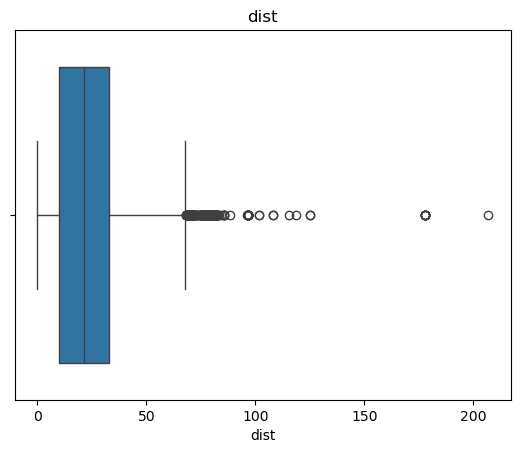

In [26]:
# Boxplot
sns.boxplot(x=df_train['dist'])
plt.title('dist')
plt.show()

Dist outliers have distances between their coordinates and their respective province's chief town ranging from 67.31 km up to over ~700 km. They have either wrong coordinates or a wrong province.

They are likely not valid. We decide to replace their values with the median.

In [27]:
df_train.loc[df_train['dist'] > 67.83, 'dist'] = np.nan

dist_median = df_train['dist'].median()

df_train['dist'] = df_train['dist'].fillna(dist_median)

**Intermediary checks**

In [28]:
#ProfileReport(df_train, title="Profiling Report")

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21656 entries, 6148 to 23654
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   is_appartment  21656 non-null  object 
 1   area           21656 non-null  float64
 2   bedrooms       21656 non-null  float64
 3   new_building   21656 non-null  object 
 4   postcode       21656 non-null  object 
 5   lat            21656 non-null  float64
 6   lon            21656 non-null  float64
 7   advertiser     21656 non-null  object 
 8   foto_amount    21656 non-null  float64
 9   subtype        21656 non-null  object 
 10  energy_value   21656 non-null  float64
 11  energy_label   21656 non-null  object 
 12  province       21656 non-null  object 
 13  price          21656 non-null  float64
 14  dist           21656 non-null  float64
dtypes: float64(8), object(7)
memory usage: 3.1+ MB


In [30]:
df_train.describe()

area      bedrooms           lat           lon   foto_amount  \
count  21656.000000  21656.000000  21656.000000  21656.000000  21656.000000   
mean       4.927353      2.703269     50.954543      4.236303      2.798914   
std        0.503481      1.169007      0.253713      0.834165      0.564835   
min        1.791759      0.000000     49.549550      2.555927      0.000000   
25%        4.605170      2.000000     50.832587      3.561421      2.484907   
50%        4.941642      3.000000     50.983190      4.324432      2.890372   
75%        5.220356      3.000000     51.140720      4.880540      3.218876   
max        7.431300      5.000000     51.501060      6.399779      4.882802   

       energy_value         price          dist  
count  21656.000000  21656.000000  21656.000000  
mean     273.845099     12.697557     22.108611  
std      144.953632      0.482745     14.763305  
min        0.000000     10.714418      0.010523  
25%      186.000000     12.388394      9.880459  
50%      253.000000     12.703813     21.093318  
75%      338.000000     13.014778     32.410275  
max      566.000000     13.815510     67.768234

## Standardizing

In [31]:
from sklearn.preprocessing import StandardScaler

df_train_s = df_train.copy()

scaler = StandardScaler()
numeric_features = ['area', 'bedrooms', 'lat','lon','foto_amount', 'energy_value', 'dist']  

df_train_s[numeric_features] = scaler.fit_transform(df_train_s[numeric_features])

df_train_s.describe()

area      bedrooms           lat           lon   foto_amount  \
count  2.165600e+04  2.165600e+04  2.165600e+04  2.165600e+04  2.165600e+04   
mean   8.517588e-16 -4.593461e-17  1.522306e-14  1.129335e-15  9.383784e-17   
std    1.000023e+00  1.000023e+00  1.000023e+00  1.000023e+00  1.000023e+00   
min   -6.227972e+00 -2.312504e+00 -5.537849e+00 -2.014488e+00 -4.955394e+00   
25%   -6.399258e-01 -6.016096e-01 -4.806957e-01 -8.090692e-01 -5.559411e-01   
50%    2.838124e-02  2.538374e-01  1.129127e-01  1.056527e-01  1.619227e-01   
75%    5.819667e-01  2.538374e-01  7.338248e-01  7.723324e-01  7.435293e-01   
max    4.973382e+00  1.964731e+00  2.154123e+00  2.593644e+00  3.689461e+00   

       energy_value         price          dist  
count  2.165600e+04  21656.000000  2.165600e+04  
mean   1.578182e-16     12.697557 -4.330977e-17  
std    1.000023e+00      0.482745  1.000023e+00  
min   -1.889235e+00     10.714418 -1.496860e+00  
25%   -6.060361e-01     12.388394 -8.282992e-01  
50%   -1.438086e-01     12.703813 -6.877294e-02  
75%    4.425993e-01     13.014778  6.978046e-01  
max    2.015552e+00     13.815510  3.092849e+00

## Encoding

In [32]:
# Separate X_train and y_train after transformations and encode
X_train_encoded = df_train_s.drop('price', axis=1)
y_train_encoded = df_train_s['price']  

In [33]:
from skrub import TableVectorizer

# 1. Instantiate TableVectorizer
vectorizer = TableVectorizer()

# 2. Apply transformation
X_train_encoded = vectorizer.fit_transform(X_train_encoded)

X_train_encoded.info()

C:\Users\Ludov\anaconda3\Lib\site-packages\skrub\_clean_null_strings.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return col.replace(r"^\s*$", "", regex=True)


<class 'pandas.core.frame.DataFrame'>
Index: 21656 entries, 6148 to 23654
Data columns (total 99 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   is_appartment                                            21656 non-null  float32
 1   area                                                     21656 non-null  float32
 2   bedrooms                                                 21656 non-null  float32
 3   new_building                                             21656 non-null  float32
 4   postcode                                                 21656 non-null  float32
 5   lat                                                      21656 non-null  float32
 6   lon                                                      21656 non-null  float32
 7   advertiser: vanderlinden, dendermonde, denderwindeke     21656 non-null  float32
 8   advertiser: woningbouw, nieu

# **Train model**

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate linear regression model
model = LinearRegression()

# Train model
model.fit(X_train_encoded, y_train_encoded)

#--------------------------------------------------------------

# Make predictions on train data for a quick check
y_train_pred = model.predict(X_train_encoded)

# Evaluate model
mse_train = mean_squared_error(y_train_encoded, y_train_pred)
r2_train = r2_score(y_train_encoded, y_train_pred)

print(f'Mean Squared Error (Train Data): {mse_train}')
print(f'R-squared (Train Data): {r2_train}')

Mean Squared Error (Train Data): 0.09618985685182646
R-squared (Train Data): 0.5872243930190069


# **Use model**

## Preprocess test data set

Recall our initial split. We now have to preprocess the df_test as we did for the train set.

In [34]:
df_test['bedrooms'] = df_test['bedrooms'].astype(int)
df_test['foto_amount'] = df_test['foto_amount'].astype(int)
df_test['postcode'] = df_test['postcode'].astype(str)

df_test = df_test.drop(columns=['is_promoted'])
df_test = df_test.drop(columns=['price_drop_date']) 
df_test = df_test.drop(columns=['sticker']) 
df_test = df_test.drop(columns=['added_time'])

### Very extreme outliers

In [35]:
df_test.loc[df_test['area'] > 20000, 'area'] = np.nan
df_test.loc[df_test['lat'] < 45, 'lat'] = np.nan
df_test.loc[df_test['lat'].isna(), 'lon'] = np.nan

### Missing values treatement

In [36]:
from sklearn.impute import SimpleImputer

df_test['advertiser'] = df_test['advertiser'].fillna('Other')

df_test[median_cols] = median_imputer.transform(df_test[median_cols])
df_test[mode_cols] = mode_imputer.transform(df_test[mode_cols])

# Check no more missing values
print(df_test.isna().sum().sort_values(ascending=False))

is_appartment    0
area             0
bedrooms         0
new_building     0
postcode         0
lat              0
lon              0
advertiser       0
foto_amount      0
subtype          0
energy_value     0
energy_label     0
province         0
price            0
dtype: int64


### Outliers treatment

In [37]:
df_test['price'] = np.log(df_test['price'])
df_test['area'] = np.log(df_test['area'])
df_test['foto_amount'] = np.log(df_test['foto_amount']+1)
df_test["energy_value"] = df_test["energy_value"].clip(lower=0, upper=566)

### Features engineering

In [38]:
df_test['postcode'] = df_test['postcode'].str[:2]

In [39]:
from geopy.distance import geodesic

# Dictionary of provinces with their capitals' coordinates (lat, lon)
province_coords = {
    'West-Vlaanderen': (51.2094, 3.2247),
    'Vlaams-Brabant': (50.8794, 4.7005),
    'Oost-Vlaanderen': (51.0543, 3.7174),
    'Henegouwen': (50.4542, 3.9522),
    'Limburg': (50.9304, 5.3377),
    'Luik': (50.6326, 5.5797),
    'Antwerpen': (51.2194, 4.4025),
    'Namen': (50.4674, 4.8716),
    'Waals-Brabant': (50.7155, 4.6091),
    'Hoofdstedelijk Gewest Brussel': (50.8503, 4.3517),
    'Luxemburg': (49.6827, 5.7723)
}

# Function to calculate distance from the coordinates and province
def calculate_distance(row):
    lat, lon = row['lat'], row['lon']
    province = row['province']
    if province in province_coords:
        province_lat, province_lon = province_coords[province]
        # Calculate the distance between the coordinates
        return geodesic((lat, lon), (province_lat, province_lon)).km
    else:
        return None  # If the province is not in the dictionary

# Apply the function to calculate the distance and create a new column 'dist'
df_test.loc[:, 'dist'] = df_test.apply(calculate_distance, axis=1)

# Check the results
print(df_test[['province', 'lat', 'lon', 'dist']].head())

                            province        lat       lon       dist
10108                West-Vlaanderen  50.838374  2.978333  44.749397
26943                Oost-Vlaanderen  51.187730  4.169153  34.939456
5038   Hoofdstedelijk Gewest Brussel  50.834768  4.362186   1.879134
3548                       Antwerpen  51.165780  4.989530  41.468501
25817                West-Vlaanderen  50.791683  3.095497  47.347072


In [40]:
import numpy as np

df_test.loc[df_test['dist'] > 67.83, 'dist'] = np.nan

dist_median = df_test['dist'].median()

df_test['dist'] = df_test['dist'].fillna(dist_median)

### Standardizing

In [41]:
from sklearn.preprocessing import StandardScaler

df_test_s = df_test.copy()

df_test_s[numeric_features] = scaler.transform(df_test_s[numeric_features])

df_test_s.describe()

area     bedrooms          lat          lon  foto_amount  \
count  5415.000000  5415.000000  5415.000000  5415.000000  5415.000000   
mean     -0.013664     0.063633    -0.003341     0.011931     0.009152   
std       0.983876     1.149767     1.001883     1.008335     0.992224   
min      -4.408019    -2.312504   -10.432346    -2.000291    -4.955394   
25%      -0.639926    -0.601610    -0.480645    -0.777541    -0.555941   
50%       0.028381     0.253837     0.112913     0.105653     0.161923   
75%       0.556574     0.253837     0.730415     0.772024     0.743529   
max       3.921556     9.663754     1.996246    13.102941     3.143995   

       energy_value        price         dist  
count   5415.000000  5415.000000  5415.000000  
mean       0.005803    12.688675    -0.002228  
std        1.018065     0.484802     0.997621  
min       -1.889235    10.714418    -1.495057  
25%       -0.654328    12.384219    -0.852795  
50%       -0.143809    12.691580    -0.079925  
75%        0.483993    13.005830     0.722136  
max        2.015552    13.814510     3.063673

### Encoding

In [42]:
X_test_encoded = df_test_s.drop('price', axis=1)
y_test_encoded = df_test_s['price']

In [43]:
from skrub import TableVectorizer

X_test_encoded = vectorizer.transform(X_test_encoded)

X_test_encoded.info()

C:\Users\Ludov\anaconda3\Lib\site-packages\skrub\_clean_null_strings.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return col.replace(r"^\s*$", "", regex=True)


<class 'pandas.core.frame.DataFrame'>
Index: 5415 entries, 10108 to 7759
Data columns (total 99 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   is_appartment                                            5415 non-null   float32
 1   area                                                     5415 non-null   float32
 2   bedrooms                                                 5415 non-null   float32
 3   new_building                                             5415 non-null   float32
 4   postcode                                                 5415 non-null   float32
 5   lat                                                      5415 non-null   float32
 6   lon                                                      5415 non-null   float32
 7   advertiser: vanderlinden, dendermonde, denderwindeke     5415 non-null   float32
 8   advertiser: woningbouw, nieuw

## Model prediction

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model.predict(X_test_encoded)

mse_test = mean_squared_error(y_test_encoded, y_test_pred)
r2_test = r2_score(y_test_encoded, y_test_pred)

print(f'Mean Squared Error (Test Data): {mse_test}')
print(f'R-squared (Test Data): {r2_test}')

Mean Squared Error (Test Data): 0.10227148535323088
R-squared (Test Data): 0.564782816614627


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Définition du modèle RandomForest avec des paramètres par défaut
rf_model = RandomForestRegressor(
    n_estimators=100,         # Nombre d'arbres dans la forêt
    max_depth=None,            # Pas de limite sur la profondeur des arbres
    min_samples_split=2,       # Nombre minimal d'échantillons requis pour diviser un noeud
    random_state=42            # Permet d'avoir des résultats reproductibles
)

# Entraînement du modèle
rf_model.fit(X_train_encoded, y_train_encoded)

# Prédictions sur les ensembles d'entraînement et de test
train_predictions = rf_model.predict(X_train_encoded)
test_predictions = rf_model.predict(X_test_encoded)

# Évaluation des résultats
train_scorerf = rf_model.score(X_train_encoded, y_train_encoded)
test_scorerf = rf_model.score(X_test_encoded, y_test_encoded)

# Affichage des résultats
print(f"R² score (train): {train_scorerf:.4f}")
print(f"R² score (test): {test_scorerf:.4f}")

# Calcul du Mean Squared Error pour plus de détails
train_mse = mean_squared_error(y_train_encoded, train_predictions)
test_mse = mean_squared_error(y_test_encoded, test_predictions)


R² score (train): 0.9574
R² score (test): 0.6825


In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define the Gradient Boosting model with hyperparameters
modelGB = GradientBoostingRegressor(n_estimators=150, learning_rate=0.2, max_depth=10)

# Perform cross-validation on the training data (5 folds)
cv_scores = cross_val_score(
    estimator=modelGB,
    X=X_train_encoded,      # Training features
    y=y_train_encoded,      # Training target
    cv=5,                   # 5-fold cross-validation
    scoring='r2',           # R² metric
    n_jobs=-1               # Use all CPU cores
)

# Display cross-validation results
print("R² scores for each fold:", cv_scores)
print(f"Mean R² (cross-validation): {cv_scores.mean():.4f}")
print(f"Standard deviation (cross-validation): {cv_scores.std():.4f}")

# Train the model on the full training data
modelGB.fit(X_train_encoded, y_train_encoded)

# Calculate the score on the training set
train_score_GB = modelGB.score(X_train_encoded, y_train_encoded)
print(f"R² score (train): {train_score_GB:.4f}")

# Calculate the score on the test set
score_GB = modelGB.score(X_test_encoded, y_test_encoded)
print(f"R² score (test): {score_GB:.4f}")

R² scores for each fold: [0.6928395  0.6942286  0.70670057 0.69590127 0.71468299]
Mean R² (cross-validation): 0.7009
Standard deviation (cross-validation): 0.0085
R² score (train): 0.9847
R² score (test): 0.6996


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
modelGB = GradientBoostingRegressor()

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [100, 150, 200, 300],      # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Learning rate
    'max_depth': [3, 5, 7, 10],                # Max depth of trees
    'subsample': [0.7, 0.8, 0.9, 1.0],         # Fraction of samples per tree
    'min_samples_split': [2, 5, 10]            # Min samples to split a node
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=modelGB,
    param_distributions=param_dist,
    n_iter=20,              # Test 20 random combinations
    cv=5,                   # 5-fold cross-validation
    scoring='r2',           # R² metric
    n_jobs=-1,              # Use all CPU cores
    verbose=2,              # Show progress
    random_state=42         # For reproducibility
)

# Fit the search on training data
random_search.fit(X_train_encoded, y_train_encoded)

# Display the best parameters and scores
print("Best parameters:", random_search.best_params_)
print(f"Best Mean R² (cross-validation): {random_search.best_score_:.4f}")

# Evaluate the best model on train and test sets
best_model = random_search.best_estimator_
train_score_GB = best_model.score(X_train_encoded, y_train_encoded)
test_score_GB = best_model.score(X_test_encoded, y_test_encoded)
print(f"R² score (train): {train_score_GB:.4f}")
print(f"R² score (test): {test_score_GB:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 10, 'learning_rate': 0.05}
Best Mean R² (cross-validation): 0.7204
R² score (train): 0.9301
R² score (test): 0.7085


In [68]:
param_dist = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'min_samples_split': [5, 10, 15]
}
random_search = RandomizedSearchCV(modelGB, param_dist, n_iter=20, cv=5, scoring='r2', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_encoded, y_train_encoded)
print("Best parameters:", random_search.best_params_)
print(f"Best Mean R² (cross-validation): {random_search.best_score_:.4f}")
best_model = random_search.best_estimator_
print(f"R² score (train): {best_model.score(X_train_encoded, y_train_encoded):.4f}")
print(f"R² score (test): {best_model.score(X_test_encoded, y_test_encoded):.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 10, 'max_depth': 7, 'learning_rate': 0.05}
Best Mean R² (cross-validation): 0.7275
R² score (train): 0.8864
R² score (test): 0.7179


In [69]:
param_dist = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'min_samples_split': [10, 15, 20]
}
random_search = RandomizedSearchCV(modelGB, param_dist, n_iter=20, cv=5, scoring='r2', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_encoded, y_train_encoded)
print("Best parameters:", random_search.best_params_)
print(f"Best Mean R² (cross-validation): {random_search.best_score_:.4f}")
best_model = random_search.best_estimator_
print(f"R² score (train): {best_model.score(X_train_encoded, y_train_encoded):.4f}")
print(f"R² score (test): {best_model.score(X_test_encoded, y_test_encoded):.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 15, 'max_depth': 7, 'learning_rate': 0.05}
Best Mean R² (cross-validation): 0.7297
R² score (train): 0.8988
R² score (test): 0.7224


In [47]:
from sklearn.ensemble import GradientBoostingRegressor

# Définition du modèle avec les meilleurs paramètres trouvés
best_model = GradientBoostingRegressor(
    subsample=0.8,
    n_estimators=500,
    min_samples_split=15,
    max_depth=7,
    learning_rate=0.05,
    random_state=42
)

# Entraînement du modèle
best_model.fit(X_train_encoded, y_train_encoded)

# Évaluation sur l'ensemble d'entraînement et de test
train_score = best_model.score(X_train_encoded, y_train_encoded)
test_score = best_model.score(X_test_encoded, y_test_encoded)

print(f"R² score (train): {train_score:.4f}")
print(f"R² score (test): {test_score:.4f}")

R² score (train): 0.9015
R² score (test): 0.7253


In [44]:
import xgboost as xgb
# Définir le modèle XGBoost
modelXG = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entraîner le modèle
modelXG.fit(X_train_encoded, y_train_encoded)

# Évaluer le modèle
train_scoreXG = modelXG.score(X_train_encoded, y_train_encoded)
test_scoreXG = modelXG.score(X_test_encoded, y_test_encoded)

print(f"R² score (train): {train_scoreXG:.4f}")
print(f"R² score (test): {test_scoreXG:.4f}")

R² score (train): 0.9064
R² score (test): 0.7225


In [66]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_dist = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1.0],
    'reg_lambda': [1.0, 2.0, 5.0]
}

random_search = RandomizedSearchCV(
    xgb.XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  
    cv=5,       
    scoring='r2',
    n_jobs=-1,  
    random_state=42,
    verbose=1  
)

random_search.fit(X_train_encoded, y_train_encoded)

print("Meilleurs paramètres:", random_search.best_params_)
print("Meilleur R²:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres: {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Meilleur R²: 0.7330598775276964


In [67]:
import xgboost as xgb

# Définir le modèle avec les meilleurs paramètres
best_modelXG = xgb.XGBRegressor(
    subsample=0.9,
    reg_lambda=1.0,
    reg_alpha=0.1,
    n_estimators=1000,
    max_depth=7,
    learning_rate=0.05,
    colsample_bytree=1.0,
    random_state=42
)

# Entraîner le modèle
best_modelXG.fit(X_train_encoded, y_train_encoded)

# Évaluer sur train et test
train_scoreXG = best_modelXG.score(X_train_encoded, y_train_encoded)
test_scoreXG = best_modelXG.score(X_test_encoded, y_test_encoded)

print(f"R² score (train): {train_scoreXG:.4f}")
print(f"R² score (test): {test_scoreXG:.4f}")

R² score (train): 0.9595
R² score (test): 0.7253


# Predict on new unseen data

In [49]:
df_newtest = pd.read_csv("test.csv")
df_newtest.head()

id  is_appartment   area  added_time  bedrooms  new_building  postcode  \
0  te0          False  346.0   134813349       3.0             0      9600   
1  te1          False  173.0   138248294       3.0             0      9890   
2  te2           True   89.0   142588858       2.0             0      4600   
3  te3          False   71.0   142729300       3.0             0      9500   
4  te4           True  124.0   138763421       2.0             0      3600   

         lat       lon                          advertiser  foto_amount  \
0  50.748390  3.604941  Axel Lenaerts Makelaars Oudenaarde         22.0   
1  50.937660  3.632149                     Hautekeete Immo         19.0   
2  50.736616  5.698354                 WOLFS L'Immobilière         20.0   
3  50.776460  3.881396                      Vastgoed Svena          9.0   
4  50.963370  5.494989                Nina Bruno Vastgoed          27.0   

   is_promoted      subtype     sticker      price_drop_date  energy_value  \
0            1       Woning  price_drop  2025-01-24 22:37:13           NaN   
1            1       Woning         NaN                  NaN         206.0   
2            1  Appartement         new                  NaN         220.0   
3            1       Woning         new                  NaN         204.0   
4            1  Appartement         NaN                  NaN          95.0   

  energy_label         province  
0          NaN  Oost-Vlaanderen  
1            c  Oost-Vlaanderen  
2            c             Luik  
3            c  Oost-Vlaanderen  
4            a          Limburg

In [50]:
ids = df_newtest['id']

df_newtest2 = df_newtest.drop('id', axis=1)

df_newtest2.head()

is_appartment   area  added_time  bedrooms  new_building  postcode  \
0          False  346.0   134813349       3.0             0      9600   
1          False  173.0   138248294       3.0             0      9890   
2           True   89.0   142588858       2.0             0      4600   
3          False   71.0   142729300       3.0             0      9500   
4           True  124.0   138763421       2.0             0      3600   

         lat       lon                          advertiser  foto_amount  \
0  50.748390  3.604941  Axel Lenaerts Makelaars Oudenaarde         22.0   
1  50.937660  3.632149                     Hautekeete Immo         19.0   
2  50.736616  5.698354                 WOLFS L'Immobilière         20.0   
3  50.776460  3.881396                      Vastgoed Svena          9.0   
4  50.963370  5.494989                Nina Bruno Vastgoed          27.0   

   is_promoted      subtype     sticker      price_drop_date  energy_value  \
0            1       Woning  price_drop  2025-01-24 22:37:13           NaN   
1            1       Woning         NaN                  NaN         206.0   
2            1  Appartement         new                  NaN         220.0   
3            1       Woning         new                  NaN         204.0   
4            1  Appartement         NaN                  NaN          95.0   

  energy_label         province  
0          NaN  Oost-Vlaanderen  
1            c  Oost-Vlaanderen  
2            c             Luik  
3            c  Oost-Vlaanderen  
4            a          Limburg

In [51]:
df_newtest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6768 entries, 0 to 6767
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_appartment    6768 non-null   bool   
 1   area             6093 non-null   float64
 2   added_time       6768 non-null   int64  
 3   bedrooms         6768 non-null   float64
 4   new_building     6768 non-null   int64  
 5   postcode         6768 non-null   int64  
 6   lat              6572 non-null   float64
 7   lon              6572 non-null   float64
 8   advertiser       6679 non-null   object 
 9   foto_amount      6768 non-null   float64
 10  is_promoted      6768 non-null   int64  
 11  subtype          6751 non-null   object 
 12  sticker          917 non-null    object 
 13  price_drop_date  506 non-null    object 
 14  energy_value     4954 non-null   float64
 15  energy_label     5285 non-null   object 
 16  province         6768 non-null   object 
dtypes: bool(1), fl

## Pre-proccess

In [52]:
df_newtest2['bedrooms'] = df_newtest2['bedrooms'].astype(int)
df_newtest2['foto_amount'] = df_newtest2['foto_amount'].astype(int)
df_newtest2['postcode'] = df_newtest2['postcode'].astype(str)

df_newtest2 = df_newtest2.drop(columns=['is_promoted'])
df_newtest2 = df_newtest2.drop(columns=['price_drop_date']) 
df_newtest2 = df_newtest2.drop(columns=['sticker']) 
df_newtest2 = df_newtest2.drop(columns=['added_time'])

In [53]:
df_newtest2.loc[df_newtest2['area'] > 20000, 'area'] = np.nan
df_newtest2.loc[df_newtest2['lat'] < 45, 'lat'] = np.nan
df_newtest2.loc[df_newtest2['lat'].isna(), 'lon'] = np.nan

In [54]:
from sklearn.impute import SimpleImputer

df_newtest2['advertiser'] = df_newtest2['advertiser'].fillna('Other')

df_newtest2[median_cols] = median_imputer.transform(df_newtest2[median_cols])
df_newtest2[mode_cols] = mode_imputer.transform(df_newtest2[mode_cols])

# Check no more missing values
print(df_newtest2.isna().sum().sort_values(ascending=False))

is_appartment    0
area             0
bedrooms         0
new_building     0
postcode         0
lat              0
lon              0
advertiser       0
foto_amount      0
subtype          0
energy_value     0
energy_label     0
province         0
dtype: int64


In [55]:
df_newtest2['area'] = np.log(df_newtest2['area'])
df_newtest2['foto_amount'] = np.log(df_newtest2['foto_amount'] + 1)
df_newtest2["energy_value"] = df_newtest2["energy_value"].clip(lower=0, upper=566)

In [56]:
df_newtest2['postcode'] = df_newtest2['postcode'].str[:2]

In [57]:
from geopy.distance import geodesic

# Dictionary of provinces with their capitals' coordinates (lat, lon)
province_coords = {
    'West-Vlaanderen': (51.2094, 3.2247),
    'Vlaams-Brabant': (50.8794, 4.7005),
    'Oost-Vlaanderen': (51.0543, 3.7174),
    'Henegouwen': (50.4542, 3.9522),
    'Limburg': (50.9304, 5.3377),
    'Luik': (50.6326, 5.5797),
    'Antwerpen': (51.2194, 4.4025),
    'Namen': (50.4674, 4.8716),
    'Waals-Brabant': (50.7155, 4.6091),
    'Hoofdstedelijk Gewest Brussel': (50.8503, 4.3517),
    'Luxemburg': (49.6827, 5.7723)
}

# Function to calculate distance from the coordinates and province
def calculate_distance(row):
    lat, lon = row['lat'], row['lon']
    province = row['province']
    if province in province_coords:
        province_lat, province_lon = province_coords[province]
        # Calculate the distance between the coordinates
        return geodesic((lat, lon), (province_lat, province_lon)).km
    else:
        return None  # If the province is not in the dictionary

# Apply the function to calculate the distance and create a new column 'dist'
df_newtest2.loc[:, 'dist'] = df_newtest2.apply(calculate_distance, axis=1)

# Check the results
print(df_newtest2[['province', 'lat', 'lon', 'dist']].head())

          province        lat       lon       dist
0  Oost-Vlaanderen  50.748390  3.604941  34.938796
1  Oost-Vlaanderen  50.937660  3.632149  14.289708
2             Luik  50.736616  5.698354  14.290009
3  Oost-Vlaanderen  50.776460  3.881396  32.990335
4          Limburg  50.963370  5.494989  11.646548


In [58]:
import numpy as np

df_newtest2.loc[df_newtest2['dist'] > 67.83, 'dist'] = np.nan

dist_median = df_newtest2['dist'].median()

df_newtest2['dist'] = df_newtest2['dist'].fillna(dist_median)

In [59]:
from sklearn.preprocessing import StandardScaler

df_newtest2_s = df_newtest2.copy()

df_newtest2_s[numeric_features] = scaler.transform(df_newtest2_s[numeric_features])

df_newtest2_s.describe()

area     bedrooms          lat          lon  foto_amount  \
count  6768.000000  6768.000000  6768.000000  6768.000000  6768.000000   
mean      0.021394     0.040734    -0.006762     0.003962     0.014926   
std       0.997160     1.105731     0.978354     1.004399     0.996178   
min      -4.408019    -2.312504    -5.519931    -2.000098    -4.955394   
25%      -0.620162    -0.601610    -0.473273    -0.798683    -0.555941   
50%       0.028381     0.253837     0.112913     0.105653     0.161923   
75%       0.613917     0.253837     0.722355     0.794017     0.743529   
max       5.409994     7.952860     2.047218     2.448599     2.846570   

       energy_value         dist  
count   6768.000000  6768.000000  
mean       0.026900     0.010173  
std        1.015843     1.014233  
min       -1.889235    -1.494018  
25%       -0.599137    -0.830246  
50%       -0.143809    -0.071420  
75%        0.532285     0.703490  
max        2.015552     3.093848

In [60]:
from skrub import TableVectorizer

df_newtest2_encoded = vectorizer.transform(df_newtest2_s)

df_newtest2_encoded.info()

C:\Users\Ludov\anaconda3\Lib\site-packages\skrub\_clean_null_strings.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return col.replace(r"^\s*$", "", regex=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6768 entries, 0 to 6767
Data columns (total 99 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   is_appartment                                            6768 non-null   float32
 1   area                                                     6768 non-null   float32
 2   bedrooms                                                 6768 non-null   float32
 3   new_building                                             6768 non-null   float32
 4   postcode                                                 6768 non-null   float32
 5   lat                                                      6768 non-null   float32
 6   lon                                                      6768 non-null   float32
 7   advertiser: vanderlinden, dendermonde, denderwindeke     6768 non-null   float32
 8   advertiser: woningbouw, nieu

In [121]:
# Prédictions sur df_newtest2_encoded
predictions_log = best_model.predict(df_newtest2_encoded)

# Affichage des premières prédictions
print(predictions[:10])

[13.17841605 12.91137763 12.21088542 11.84360702 12.82221461 13.23228788
 12.91633723 13.48269578 13.03163865 12.94155126]


In [122]:
# Conversion des prédictions logarithmiques en valeurs normales
predictions_euro = np.exp(predictions_log)

# Affichage des premières valeurs
print(predictions_euro[:10])

[528826.69748007 404892.80314043 200964.87491207 139191.64735516
 370354.0093394  558096.89883437 406905.89830966 716902.96973064
 456634.5359635  417296.07364476]


In [62]:
# Calcul des résidus sur l'ensemble de test
residuals = y_test_encoded - best_model.predict(X_test_encoded)
std_error = np.std(residuals)  # Écart-type des résidus
confidence_interval = 1.282 * std_error  # 80% de confiance (α = 0.2)

# Prédictions sur df_newtest2_encoded
predictions_log = best_model.predict(df_newtest2_encoded)
predictions_euro = np.exp(predictions_log)

# Calcul des bornes dans l'espace logarithmique, puis conversion en euros
lower_bound = np.exp(predictions_log - confidence_interval)
upper_bound = np.exp(predictions_log + confidence_interval)

# Création du DataFrame pour le fichier final
results = pd.DataFrame({
    'ID': ids,  # Assurez-vous que 'ids' est défini (par ex., df_newtest2_encoded['ID'])
    'LOWER': lower_bound,
    'UPPER': upper_bound,
    'PRED': predictions_euro
})

# Sauvegarde dans un fichier CSV
results.to_csv('predictions_with_intervals2.csv', index=False)